In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from math import pi

%matplotlib inline
plt.rc('font',family='Arial') 
plt.style.use("ggplot")
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.family'] = 'Arial'
font_T = fm.FontProperties(family='Arial', size=28, stretch=0, weight='bold')
font_T_small = fm.FontProperties(family='Arial', size=20, stretch=0)
font_T_mini = fm.FontProperties(family='Arial', size=15, stretch=0)

e:\anaconda\envs\test\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
e:\anaconda\envs\test\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
e:\anaconda\envs\test\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [26]:
df_cp = pd.DataFrame({
    'group': ['A', 'B', 'B', 'D', 'E'],
    'V1': [93.74, 70.79, 68.10, 71.20, 68.99],
    'V2': [86.87, 77.84, 93.10, 69.33, 66.93],
    'V3': [89.09, 89.52, 71.90, 65.87, 70.28],
    'V4': [95.96, 79.04, 90.48, 70.93, 70.03],
    'V5': [96.77, 76.80, 89.52, 73.33, 73.39],
    'V6': [98.18, 81.79, 92.86, 84.80, 72.87]
})
df_cp

,group,V1,V2,V3,V4,V5,V6
0,A,93.74,86.87,89.09,95.96,96.77,98.18
1,B,70.79,77.84,89.52,79.04,76.80,81.79
2,B,68.10,93.10,71.90,90.48,89.52,92.86
3,D,71.20,69.33,65.87,70.93,73.33,84.80
4,E,68.99,66.93,70.28,70.03,73.39,72.87


In [27]:
def make_spider(df, row, title, color):
    # 变量数量和值
    categories = list(df)[1:]
    N = len(categories)
    values = df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]

    # 每个轴在图中的角度是多少？（将图除以变量数）
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # 图的位置
    ax = plt.subplot(5, 1, row + 1, polar=True)

    # 让第一个变量在顶部：
    # ax.set_theta_offset(pi / 2)
    # ax.set_theta_direction(-1)
    
    # 画图
    plt.plot(angles, values, color=color, 
            linewidth=2, linestyle='solid',
            marker='o', markersize=5)
    plt.fill(angles, values, color=color, alpha=0.4)  # 填充

    # 绘制每个变量的一个轴+添加标签
    plt.xticks(angles[:-1], 
               categories, 
               color='grey', 
               fontproperties={'family':'Arial', 'size':12, 'weight':'bold'})

    # 绘制y轴标签
    # 设置极坐标图中极径轴刻度标签的位置
    ax.set_rlabel_position(30)
    plt.yticks(color="grey", 
               fontproperties={'family':'Arial', 'size':9})
    # 控制圆的大小
    plt.ylim(min(values)-5, max(values)+5)

    # 添加标题
    plt.title(title, fontproperties=font_T, color=color)


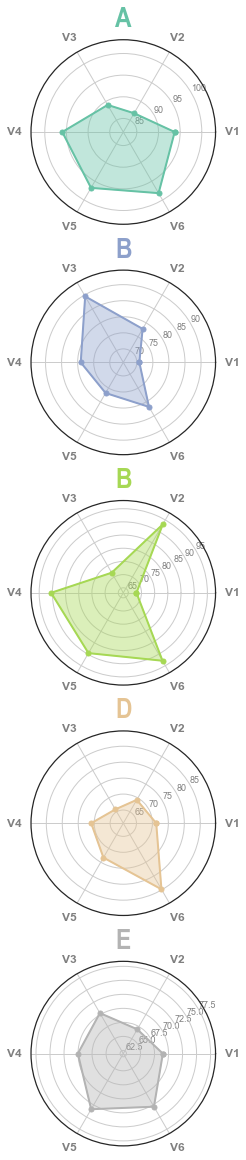

In [28]:
# 调色盘
my_palette = plt.cm.get_cmap("Set2", len(df_cp.index))
 
figure = plt.figure(figsize=(20, 16), constrained_layout=True)
# gs = GridSpec(5, 4, figure)

# 循环画每一个数据集
for row in range(0, len(df_cp.index)):
    make_spider(df=df_cp,
                row=row, 
                title=df_cp['group'][row], 
                color=my_palette(row)
                )
plt.savefig('rader_chart.png', dpi=300, bbox_inches='tight')